# Regression discontinuity with `pymc` models

In [1]:
import arviz as az
import pandas as pd
import pathlib

In [2]:
# %config InlineBackend.figure_format = 'svg'
az.style.use("arviz-darkgrid")

In [3]:
%load_ext autoreload
%autoreload 2

## Load data

In [4]:
rd_data_path = (
    pathlib.Path.cwd().parents[1] / "causalpy" / "data" / "regression_discontinuity.csv"
)
df = pd.read_csv(rd_data_path)

## Run the analysis

In [5]:
from causalpy.pymc_experiments import RegressionDiscontinuity
from causalpy.pymc_models import LinearRegression

result = RegressionDiscontinuity(
    df,
    formula="y ~ 1 + bs(x, df=6) + treated",
    prediction_model=LinearRegression(),
    treatment_threshold=0.5,
)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta, sigma]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 3 seconds.
Sampling: [beta, sigma, y_hat]
Sampling: [y_hat]


Sampling: [y_hat]


Sampling: [y_hat]


Sampling: [y_hat]


/Users/benjamv/mambaforge/envs/CausalPy/lib/python3.10/site-packages/arviz/plots/hdiplot.py:156: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hdi_data = hdi(y, hdi_prob=hdi_prob, circular=circular, multimodal=False, **hdi_kwargs)


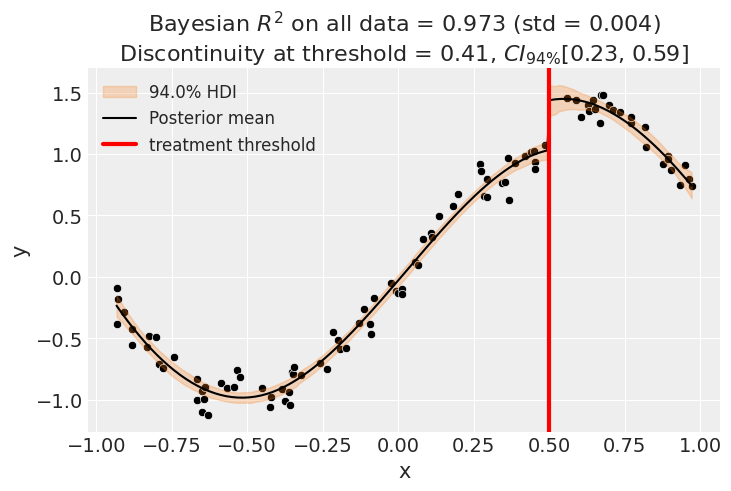

In [6]:
fig, ax = result.plot()